In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris #função para carregar o dataset Iris
from sklearn.model_selection import train_test_split #função para separar treino e teste
from sklearn.tree import DecisionTreeClassifier #função para carregar a árvore de decisão
from sklearn.metrics import accuracy_score #função para medir a acurácia da previsão
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df_train = pd.read_csv('train.csv', sep=',')
df_test = pd.read_csv('test.csv', sep=',')
df_target = pd.read_csv('gender_submission.csv', sep=',')

In [4]:
pd.concat([df_train, df_test])['Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1309, dtype: object

In [5]:
le_ticket = LabelEncoder()
le_ticket.fit(pd.concat([df_train, df_test])['Ticket'].unique())
df_train['Ticket'] = le_ticket.transform(df_train['Ticket'])
df_test['Ticket'] = le_ticket.transform(df_test['Ticket'])

le_cabin = LabelEncoder()
le_cabin.fit(pd.concat([df_train, df_test])['Cabin'].unique())
df_train['Cabin'] = le_cabin.transform(df_train['Cabin'])
df_test['Cabin'] = le_cabin.transform(df_test['Cabin'])

le_embarked = LabelEncoder()
le_embarked.fit(pd.concat([df_train, df_test])['Embarked'].unique())
df_train['Embarked'] = le_embarked.transform(df_train['Embarked'])
df_test['Embarked'] = le_embarked.transform(df_test['Embarked'])

le_sex = LabelEncoder()
le_sex.fit(pd.concat([df_train, df_test])['Sex'].unique())
df_train['Sex'] = le_sex.transform(df_train['Sex'])
df_test['Sex'] = le_sex.transform(df_test['Sex'])

In [6]:
#ESPECIFICA FEATURES A SEREM UTILIZADAS
features = ['Pclass', 'Age', 'SibSp', 'Fare', 'Ticket', 'Cabin', 'Parch', 'Embarked', 'Sex']

#GERA O X_TRAIN E Y_TRAIN CONSIDERANDO VARIÁVEIS NUMÉRICAS
X_train = df_train.dropna()[features]
y_train = df_train.dropna()['Survived']

#GERA O X_TEST E Y_TEST CONSIDERANDO VARIÁVEIS NUMÉRICAS
df_test['Survived'] = df_target['Survived']
df_test = df_test.dropna()

X_test = df_test[features]
y_test = df_test['Survived']

In [7]:
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5)

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5)

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy_score(y_pred, y_test)

0.8368580060422961

[Text(0.4444444444444444, 0.875, 'x[8] <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= 2.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]'),
 Text(0.6666666666666666, 0.625, 'x[5] <= 184.0\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.492\nsamples = 94\nvalue = [53, 41]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 3.5\ngini = 0.248\nsamples = 359\nvalue = [307, 52]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.218\nsamples = 345\nvalue = [302, 43]')]

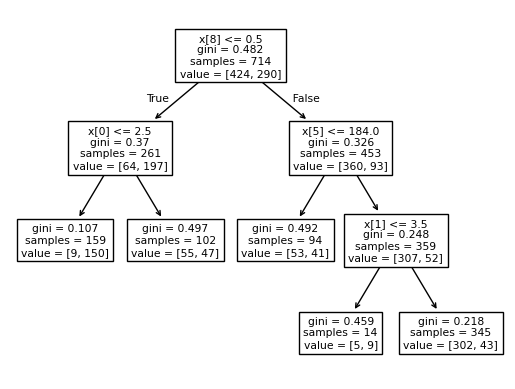

In [11]:
plot_tree(model)

In [12]:
X_train

,Pclass,Age,SibSp,Fare,Ticket,Cabin,Parch,Embarked,Sex
0,3,22.0,1,7.2500,720,186,0,2,1
1,1,38.0,1,71.2833,816,106,0,0,0
2,3,26.0,0,7.9250,914,186,0,2,0
3,1,35.0,1,53.1000,65,70,0,2,0
4,3,35.0,0,8.0500,649,186,0,2,1
...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,29.1250,659,186,5,1,0
886,2,27.0,0,13.0000,130,186,0,2,1
887,1,19.0,0,30.0000,18,40,0,2,0
889,1,26.0,0,30.0000,11,77,0,0,1
